# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [69]:
import pandas as pd
import seaborn as sns
import random 

In [4]:
df = pd.read_csv('valorant_games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   object 
 4   date           1000 non-null   object 
 5   agent          1000 non-null   object 
 6   map            1000 non-null   object 
 7   outcome        1000 non-null   object 
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

In [5]:
df

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,4/11/2023,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,4/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,9,3,Diamond 2,11/11/2024,Astra,Pearl,Win,13,9,17,13,8,1.3,30,19,133,212,4
996,997,9,3,Diamond 2,11/11/2024,Omen,Ascent,Loss,11,13,27,14,11,1.9,41,28,176,299,1
997,998,9,3,Diamond 2,11/11/2024,Astra,Pearl,Loss,6,13,12,16,5,0.8,0,47,143,194,2
998,999,9,3,Diamond 2,11/12/2024,Omen,Split,Win,13,10,18,13,8,1.4,26,31,134,214,5


# My Question

### Is Mitchell Harrison bad at Valorant?

## To find out if Mr. Harrison is bad at Valorant, first we need to find out what Agent he plays the most. What agent does Mr. Harrison play the most? What is the percentage of the usage of this Agent?

## Next we need to determine his individual performance as a player, are his stats good? Does his average damage per game correlate to his headshot percentage?

## Finally, we need to determine his winrate, does he have a consistent winrate above 50%?

# My Analysis

In [32]:
frequency_table_percentages = df['agent'].value_counts(normalize=True) * 100
frequency_table_percentages

agent
Cypher       71.9
Killjoy      23.0
Viper         1.7
Omen          1.0
KAY/O         0.9
Brimstone     0.5
Breach        0.3
Vyse          0.3
Astra         0.2
Phoenix       0.1
Fade          0.1
Name: proportion, dtype: float64

## His most used Agent is Cypher, with a 71.9% pick rate.

In [91]:
df.describe()

,game_id,episode,act,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,7.500000,2.066000,10.589000,10.52700,15.299000,14.249000,4.656000,1.178400,10.308000,22.763000,134.446000,205.382000,2.990000
std,288.819436,1.102368,0.868561,3.359966,3.55273,5.253113,3.724362,2.656072,0.656784,43.383791,9.919033,35.199916,56.539958,1.368127
min,1.000000,6.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.200000,-124.000000,2.000000,42.000000,59.000000,1.000000
25%,250.750000,7.000000,1.000000,8.000000,8.00000,12.000000,13.000000,3.000000,0.800000,-20.000000,15.000000,110.000000,166.000000,2.000000
50%,500.500000,7.000000,2.000000,13.000000,13.00000,15.000000,15.000000,4.000000,1.100000,9.000000,22.000000,133.000000,203.000000,3.000000
75%,750.250000,9.000000,3.000000,13.000000,13.00000,19.000000,17.000000,6.000000,1.400000,39.000000,29.000000,157.000000,240.000000,4.000000
max,1000.000000,9.000000,3.000000,18.000000,20.00000,35.000000,26.000000,20.000000,9.700000,293.000000,63.000000,373.000000,572.000000,5.000000


<Axes: xlabel='kdr', ylabel='avg_dmg_delta'>

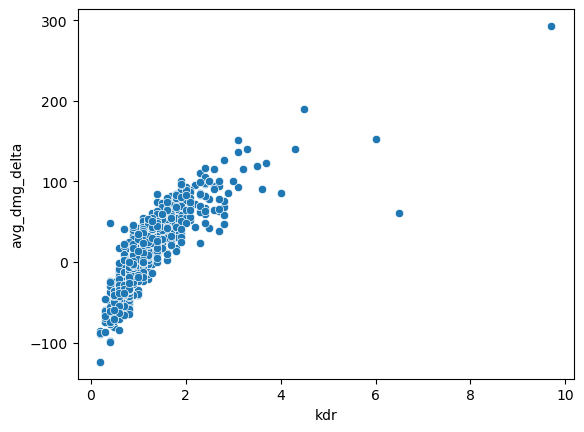

In [49]:
sns.scatterplot(data=df, x= 'kdr', y= 'avg_dmg_delta')

In [51]:
df['avg_dmg_delta'].corr(df['kdr'])

0.8284710161352296

## His KDR is strongly correlated to his average damage per game, showing that when his average damage is low, his KDR is also low respectively.

In [66]:
df.value_counts('outcome')

outcome
Loss    497
Win     491
Draw     12
Name: count, dtype: int64

## Theoretical Winrate Probability:
# 491/1000 = 49.1% to win
## Empirical Winrate Probability (Simulating another 1000 games):

In [87]:
rounds = 0
Win = 0
trials = 1000
while rounds < 1000:
    num = random.randint(0,1000)
    if num <= 491:
        Win += 1 
    rounds += 1

print(str((Win/trials) * 100))

50.1


## If another 1000 games were simulated based off of his current winrate, he would win 501 of the games, or he would win 50.1% of the time.

# My Answer

### Based on the data, Mitchell Harrison doesn't completely suck at the game. He is at best "okay". Based on his agent usage of Cypher 71.9% of the time, we can assume Harrison does not play on the frontlines 71.9% of the time. His KDR is also strongly correlated to his average damage per game. The mean of his KDR is 1.17 which isn't good. Additionally his winrate is under 50% which means he doesn't win the majority of the games he has played. Therefore we can only assume he is just "okay" at Valorant